In [2]:
import pandas as pd

passengers = pd.read_csv('data.csv')
passengers.head()

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


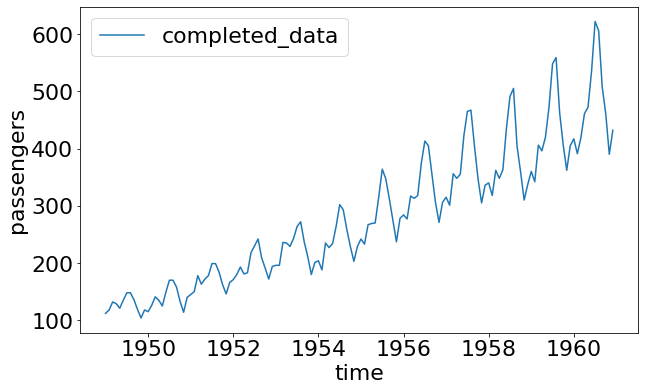

In [3]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x='time', y='passengers', data = passengers, label='completed_data')

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(passengers)

StandardScaler()

In [5]:
scaled_data = sc.transform(passengers)
x = scaled_data[:,0]
y = scaled_data[:,1]

Text(0.5, 0, 'Date')

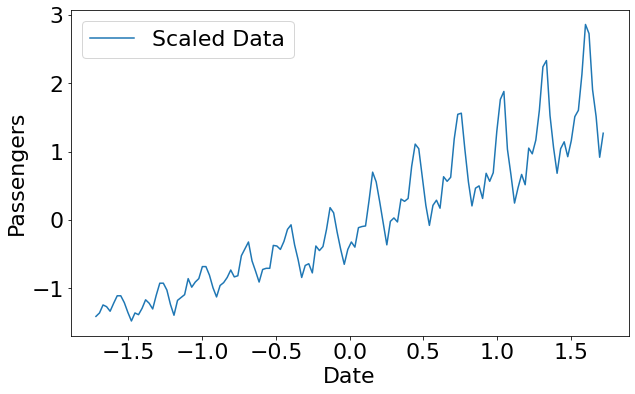

In [6]:
import matplotlib.pyplot as plt

sns.lineplot(x = x, y = y, label = 'Scaled Data')
plt.ylabel('Passengers')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

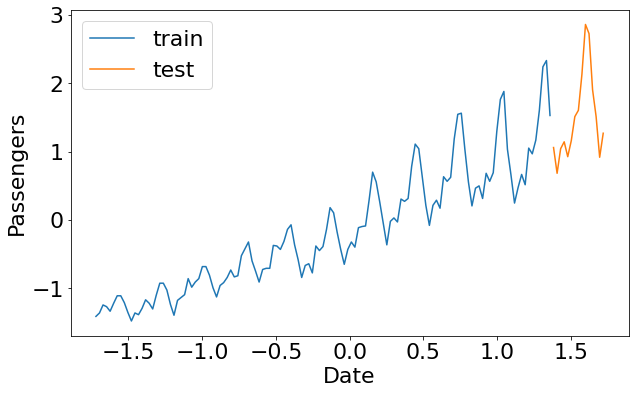

In [7]:
train_size = int(len(passengers) * 0.9)
test_size = len(passengers) - train_size

x_train = x[0:train_size]
y_train = y[0:train_size]

x_test = x[train_size:len(passengers)]
y_test = y[train_size:len(passengers)]

sns.lineplot(x = x_train, y = y_train, label = 'train')
sns.lineplot(x = x_test, y = y_test, label = 'test')
plt.ylabel('Passengers')
plt.xlabel('Date')

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(
    1, 
    input_dim = 1,     
    kernel_initializer='Ones', # Weights
    activation='linear',
    use_bias=False))

model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train)

5/5 [==============================] - 1s 1ms/step - loss: 0.1285


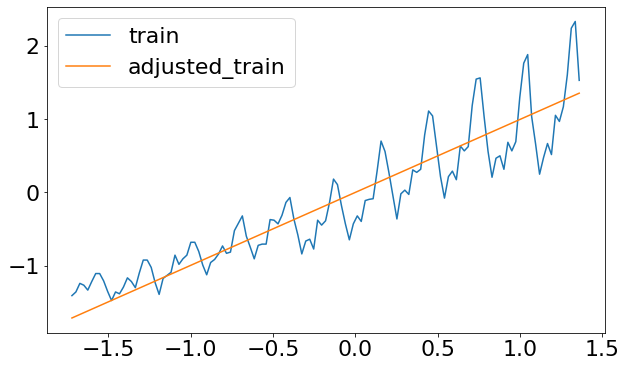

In [11]:
y_predict = model.predict(x_train)

sns.lineplot(x = x_train, y=y_train, label = 'train')
sns.lineplot(x = x_train, y=y_predict[:,0], label = 'adjusted_train')



In [12]:
d = {'time': x_train, 'passengers': y_predict[:, 0]}

In [13]:
results = pd.DataFrame(data = d)
results.head()

,time,passengers
0,-1.720064,-1.712474
1,-1.696007,-1.688524
2,-1.671950,-1.664573
3,-1.647894,-1.640622
4,-1.623837,-1.616672


In [14]:
transf_results = sc.inverse_transform(results)
transf_results = pd.DataFrame(transf_results)
transf_results.columns = ['time', 'passengers']

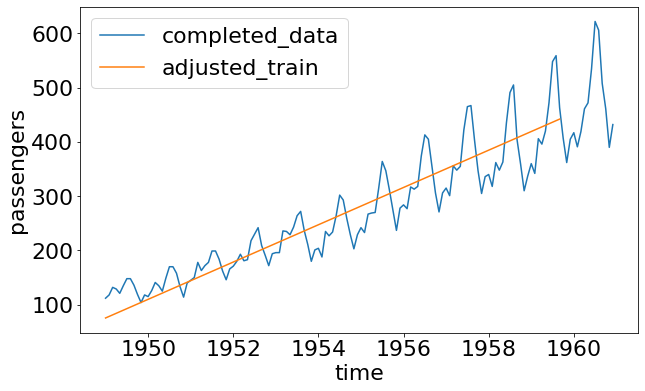

In [15]:
sns.lineplot(x='time', y='passengers', data=passengers, label='completed_data')
sns.lineplot(x='time', y='passengers', data=transf_results, label='adjusted_train')

In [16]:
y_predict_test = model.predict(x_test)
d = {'time' : x_test, 'passengers': y_predict_test[:,0] }

test_results = pd.DataFrame(data=d)

In [18]:
transf_results_test = sc.inverse_transform(test_results)
transf_results_test = pd.DataFrame(transf_results_test)
transf_results_test.columns = ['time', 'passengers']

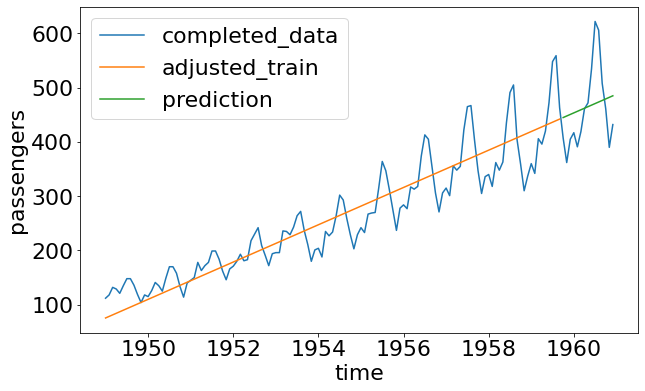

In [19]:
sns.lineplot(x='time', y='passengers', data=passengers, label='completed_data')
sns.lineplot(x='time', y='passengers', data=transf_results, label='adjusted_train')
sns.lineplot(x='time', y='passengers', data=transf_results_test, label='prediction')

In [33]:
model2 = Sequential()

model2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
model2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
model2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

model2.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [35]:
model2.fit(x_train, y_train, epochs=500)

ch 251/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5468
Epoch 252/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5441
Epoch 253/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5421
Epoch 254/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5399
Epoch 255/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5381
Epoch 256/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5362
Epoch 257/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5346
Epoch 258/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5330
Epoch 259/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5312
Epoch 260/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 261/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5280
Epoch 262/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5267
Epoch 263/500
5/5 [========================

In [36]:
y_predict = model2.predict(x_train)
y_predict_test = model2.predict(x_test)

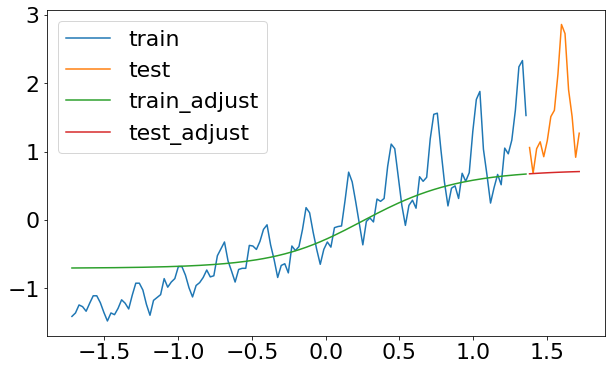

In [37]:
sns.lineplot(x=x_train, y=y_train, label='train')
sns.lineplot(x=x_test, y=y_test, label='test')
sns.lineplot(x=x_train, y=y_predict[:,0], label='train_adjust')
sns.lineplot(x=x_test, y=y_predict_test[:,0], label='test_adjust')

In [38]:
import numpy as np

def split_data(array, n_steps):
    X_new, y_new = [], []

    for i in range (n_steps, array.shape[0]):
        X_new.append(list(array.loc[i-n_steps:i-1]))
        y_new.append(array.loc[i])

    X_new, y_new = np.array(X_new), np.array(y_new)
    return X_new, y_new

In [39]:
array = pd.DataFrame(y_train)[0]

In [40]:
x_train_new, y_train_new = split_data(array, 1)

print(x_train_new[0:5])
print(y_train_new[0:5])

[[-1.40777884]
 [-1.35759023]
 [-1.24048348]
 [-1.26557778]
 [-1.33249593]]
[-1.35759023 -1.24048348 -1.26557778 -1.33249593 -1.21538918]


In [41]:
array2 = pd.DataFrame(y_test)[0]
x_test_new, y_test_new = split_data(array2, 1)

In [42]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
model3.add(Dense(64, kernel_initializer='random_uniform', activation = 'sigmoid', use_bias=False))
model3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

model3.compile(loss='mean_squared_error', optimizer='adam')

model3.fit(x_train_new, y_train_new, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7726
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7517
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7306
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7091
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6621
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6383
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6089
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5778
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5422
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5039
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4643
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

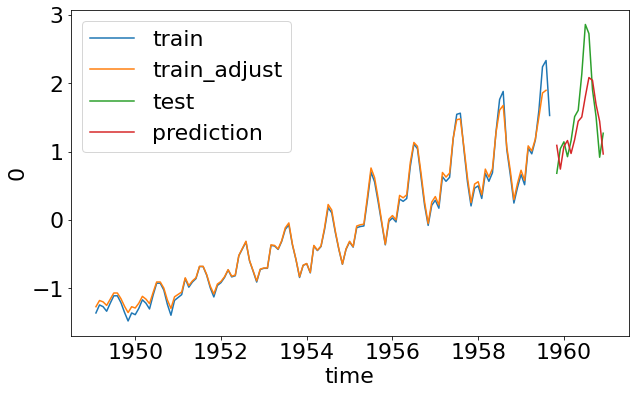

In [45]:
y_predict_new = model3.predict(x_train_new)
y_predict_test_new = model3.predict(x_test_new)
results = pd.DataFrame(y_predict_test_new)[0]

sns.lineplot(x='time', y=y_train_new, data=passengers[1:129], label='train')
sns.lineplot(x='time', y=pd.DataFrame(y_predict_new)[0], data=passengers[1:129], label='train_adjust')
sns.lineplot(x='time', y=y_test_new, data=passengers[130:144], label='test')
sns.lineplot(x='time', y=results.values, data=passengers[130:144], label='prediction')

In [46]:
x_train_new, y_train_new = split_data(array, 4)
print(x_train_new[0:5])
print(y_train_new[0:5])

[[-1.40777884 -1.35759023 -1.24048348 -1.26557778]
 [-1.35759023 -1.24048348 -1.26557778 -1.33249593]
 [-1.24048348 -1.26557778 -1.33249593 -1.21538918]
 [-1.26557778 -1.33249593 -1.21538918 -1.10664719]
 [-1.33249593 -1.21538918 -1.10664719 -1.10664719]]
[-1.33249593 -1.21538918 -1.10664719 -1.10664719 -1.20702441]


In [47]:
x_test_new, y_test_new = split_data(array2, 4)

model4 = Sequential()

model4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
model4.add(Dense(64, kernel_initializer='random_uniform', activation = 'sigmoid', use_bias=False))
model4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train_new, y_train_new, epochs = 300)

==================] - 0s 3ms/step - loss: 0.1378
Epoch 51/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 52/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1376
Epoch 53/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1371
Epoch 54/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1370
Epoch 55/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1367
Epoch 56/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1367
Epoch 57/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 58/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 59/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 60/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1360
Epoch 61/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1356
Epoch 62/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1357
Epo

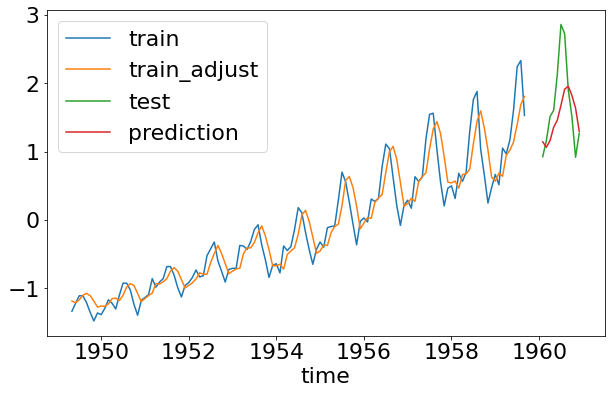

In [49]:
y_predict_new = model4.predict(x_train_new)
y_predict_test_new = model4.predict(x_test_new)
train_results = pd.DataFrame(y_predict_new)[0]
results = pd.DataFrame(y_predict_test_new)[0]


sns.lineplot(x='time', y=y_train_new, data=passengers[4:129], label='train')
sns.lineplot(x='time', y=train_results.values, data=passengers[4:129], label='train_adjust')
sns.lineplot(x='time', y=y_test_new, data=passengers[133:144], label='test')
sns.lineplot(x='time', y=results.values, data=passengers[133:144], label='prediction')